**IMPORT LIBRARY**

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**PEMANGILAN DATASET**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/Depression Professional Dataset .csv"
df   = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df.head(20)

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
5,Female,60,1.0,4.0,7-8 hours,Unhealthy,Yes,12,3,Yes,No
6,Female,30,4.0,2.0,More than 8 hours,Healthy,No,3,1,No,No
7,Male,30,1.0,2.0,More than 8 hours,Unhealthy,Yes,6,1,No,No
8,Male,56,1.0,2.0,More than 8 hours,Moderate,Yes,11,5,Yes,No
9,Female,35,3.0,4.0,Less than 5 hours,Moderate,No,6,4,Yes,No


**STRUKTUR DAN STATISTIKA DATA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [6]:
print (df.describe())

               Age  Work Pressure  Job Satisfaction   Work Hours  \
count  2054.000000    2054.000000       2054.000000  2054.000000   
mean     42.171860       3.021908          3.015093     5.930867   
std      11.461202       1.417312          1.418432     3.773945   
min      18.000000       1.000000          1.000000     0.000000   
25%      35.000000       2.000000          2.000000     3.000000   
50%      43.000000       3.000000          3.000000     6.000000   
75%      51.750000       4.000000          4.000000     9.000000   
max      60.000000       5.000000          5.000000    12.000000   

       Financial Stress  
count       2054.000000  
mean           2.978578  
std            1.413362  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


Gender
Male      1066
Female     988
Name: count, dtype: int64


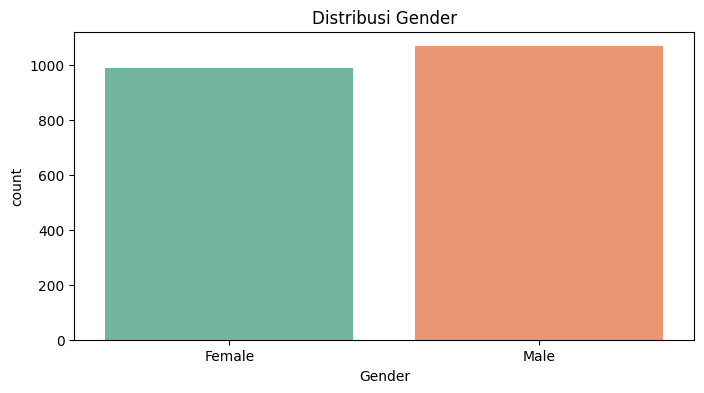

In [33]:
print (df["Gender"].value_counts())
plt.figure(figsize=(8, 4))
sns.countplot(x="Gender",hue="Gender", data=df, palette="Set2")
plt.title("Distribusi Gender")
plt.show()

/tmp/ipython-input-28-4182541968.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori Umur', data=df, palette="Set2")


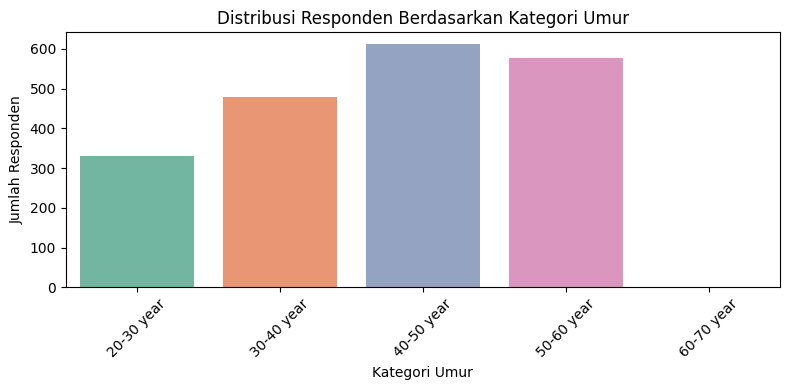

In [28]:
# Buat kategori umur berdasarkan distribusi 'Age' di dataset
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30 year', '30-40 year', '40-50 year', '50-60 year', '60-70 year']

# Buat kolom kategori umur
df['Kategori Umur'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Visualisasi jumlah responden berdasarkan kategori umur
plt.figure(figsize=(8, 4))
sns.countplot(x='Kategori Umur', data=df, palette="Set2")
plt.title("Distribusi Responden Berdasarkan Kategori Umur")
plt.xlabel("Kategori Umur")
plt.ylabel("Jumlah Responden")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Work Pressure
5.0    424
2.0    413
4.0    412
3.0    404
1.0    401
Name: count, dtype: int64


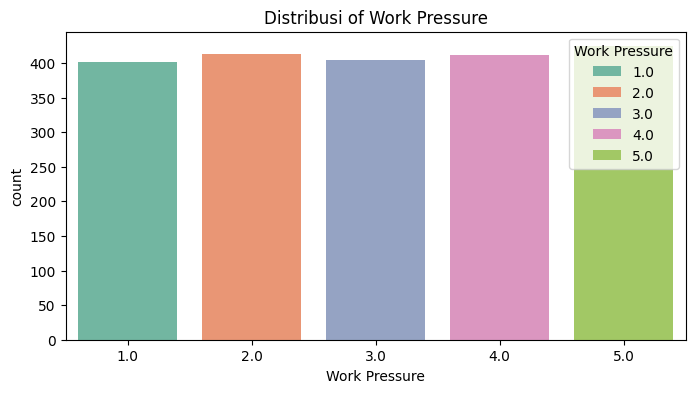

In [8]:
print (df["Work Pressure"].value_counts())
plt.figure(figsize=(8, 4))
sns.countplot(x="Work Pressure",hue="Work Pressure", data=df, palette="Set2")
plt.title("Distribusi of Work Pressure")
plt.show()

Job Satisfaction
5.0    431
2.0    431
3.0    404
1.0    396
4.0    392
Name: count, dtype: int64


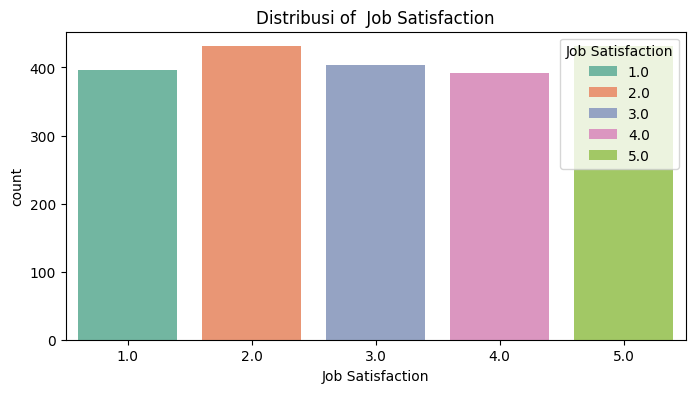

In [12]:
print (df["Job Satisfaction"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Job Satisfaction",hue= "Job Satisfaction" , data=df, palette="Set2")
plt.title("Distribusi of  Job Satisfaction")
plt.show()

Sleep Duration
7-8 hours            530
Less than 5 hours    525
5-6 hours            505
More than 8 hours    494
Name: count, dtype: int64


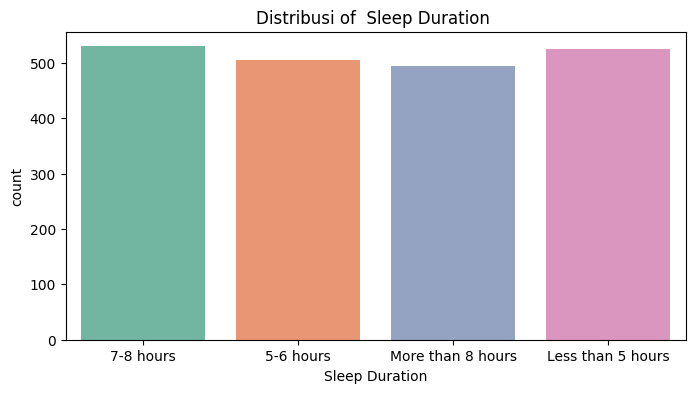

In [25]:
print (df["Sleep Duration"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Sleep Duration",hue="Sleep Duration" , data=df, palette="Set2")
plt.title("Distribusi of  Sleep Duration ")
plt.show()

Dietary Habits
Unhealthy    713
Healthy      681
Moderate     660
Name: count, dtype: int64


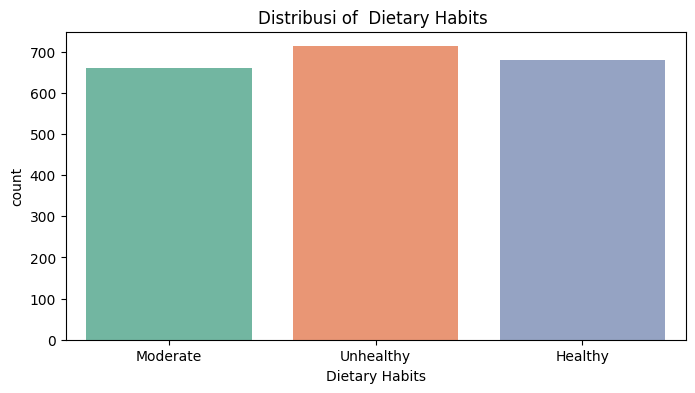

In [27]:
print (df["Dietary Habits"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Dietary Habits",hue="Dietary Habits" , data=df, palette="Set2")
plt.title("Distribusi of  Dietary Habits ")
plt.show()

/tmp/ipython-input-35-2101529380.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori Jam Kerja', data=df, palette="Set2")


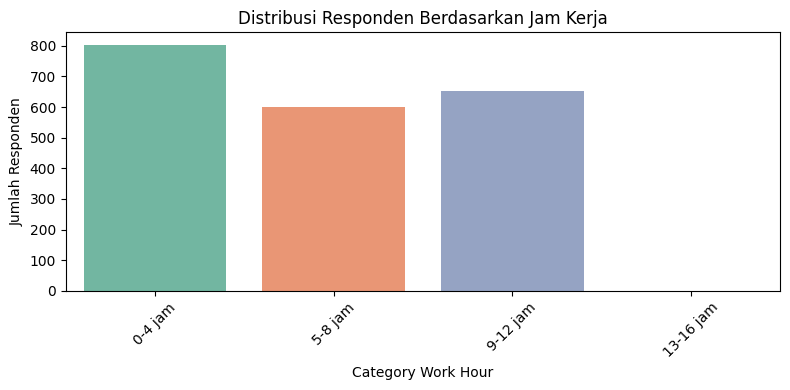

In [35]:
bins = [0, 4, 8, 12, 16]
labels = ['0-4 jam', '5-8 jam', '9-12 jam', '13-16 jam']

df['Kategori Jam Kerja'] = pd.cut(df['Work Hours'], bins=bins, labels=labels, include_lowest=True)

# Visualisasi jumlah responden berdasarkan kategori jam kerja
plt.figure(figsize=(8, 4))
sns.countplot(x='Kategori Jam Kerja', data=df, palette="Set2")
plt.title("Distribusi Responden Berdasarkan Jam Kerja")
plt.xlabel("Category Work Hour")
plt.ylabel("Jumlah Responden")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Financial Stress
2    447
4    407
1    407
5    405
3    388
Name: count, dtype: int64


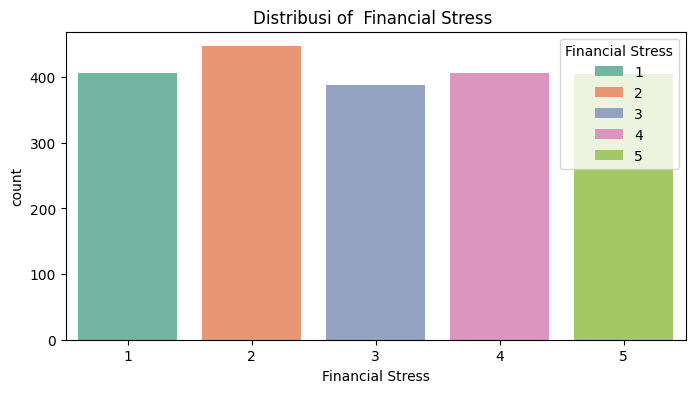

In [37]:
print (df["Financial Stress"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Financial Stress",hue="Financial Stress" , data=df, palette="Set2")
plt.title("Distribusi of  Financial Stress ")
plt.show()

Family History of Mental Illness
No     1046
Yes    1008
Name: count, dtype: int64


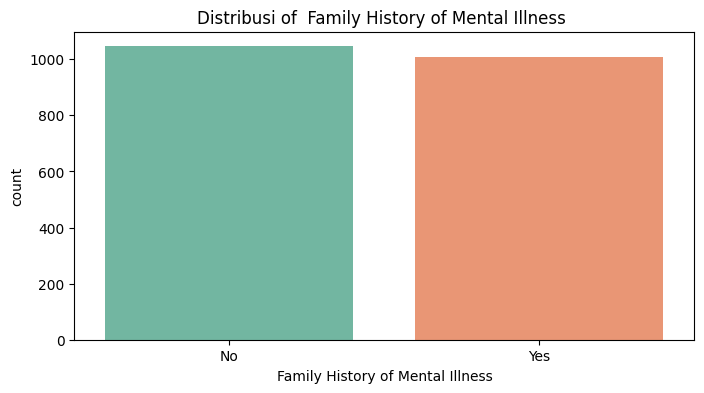

In [39]:
print (df["Family History of Mental Illness"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Family History of Mental Illness",hue="Family History of Mental Illness" , data=df, palette="Set2")
plt.title("Distribusi of  Family History of Mental Illness ")
plt.show()

Depression
No     1851
Yes     203
Name: count, dtype: int64


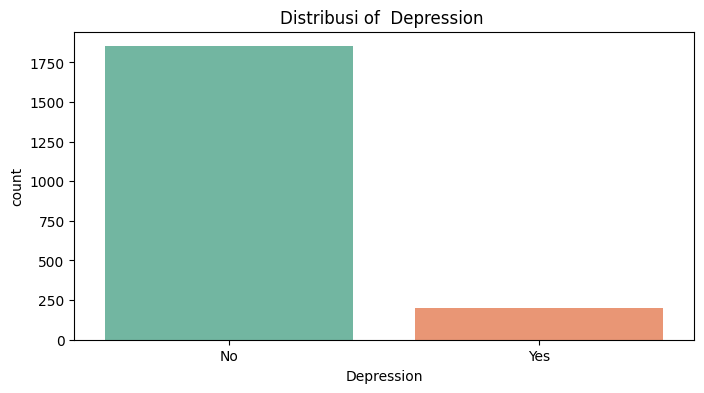

In [40]:
print (df["Depression"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Depression",hue="Depression" , data=df, palette="Set2")
plt.title("Distribusi of  Depression ")
plt.show()

**PEMERIKSAAN NILAI KOSONG DAN DUPLIKAT**

In [43]:
print(df.isnull().sum())

Gender                                    0
Age                                       0
Work Pressure                             0
Job Satisfaction                          0
Sleep Duration                            0
Dietary Habits                            0
Have you ever had suicidal thoughts ?     0
Work Hours                                0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Kategori Umur                            57
Kategori Jam Kerja                        0
dtype: int64


In [42]:
# Cek duplikasi
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


**HISTOGRAM UNTUK KOLOM NUMERIK**

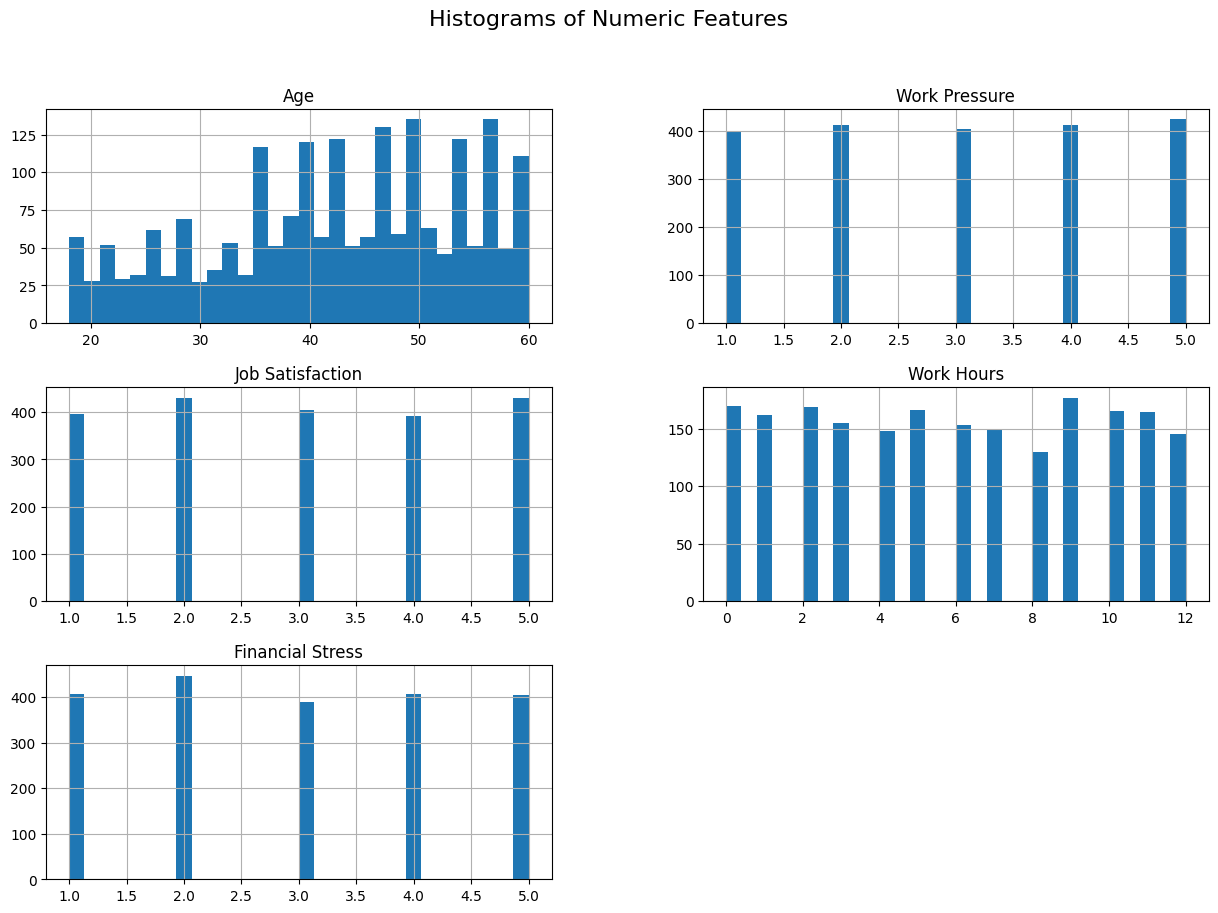

In [44]:
numeric_cols = ['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression', ]
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

**VISUALISASI HEATMAP UNTUK CEK NILAI KOSONG**

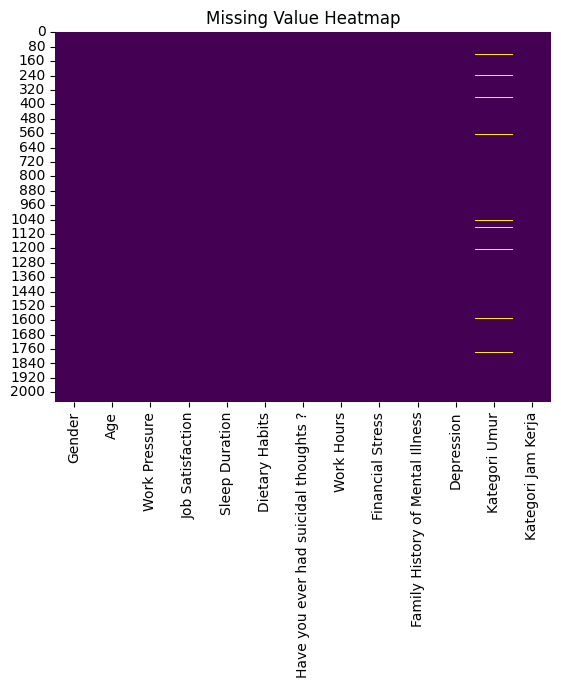

In [46]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [48]:
numerik = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

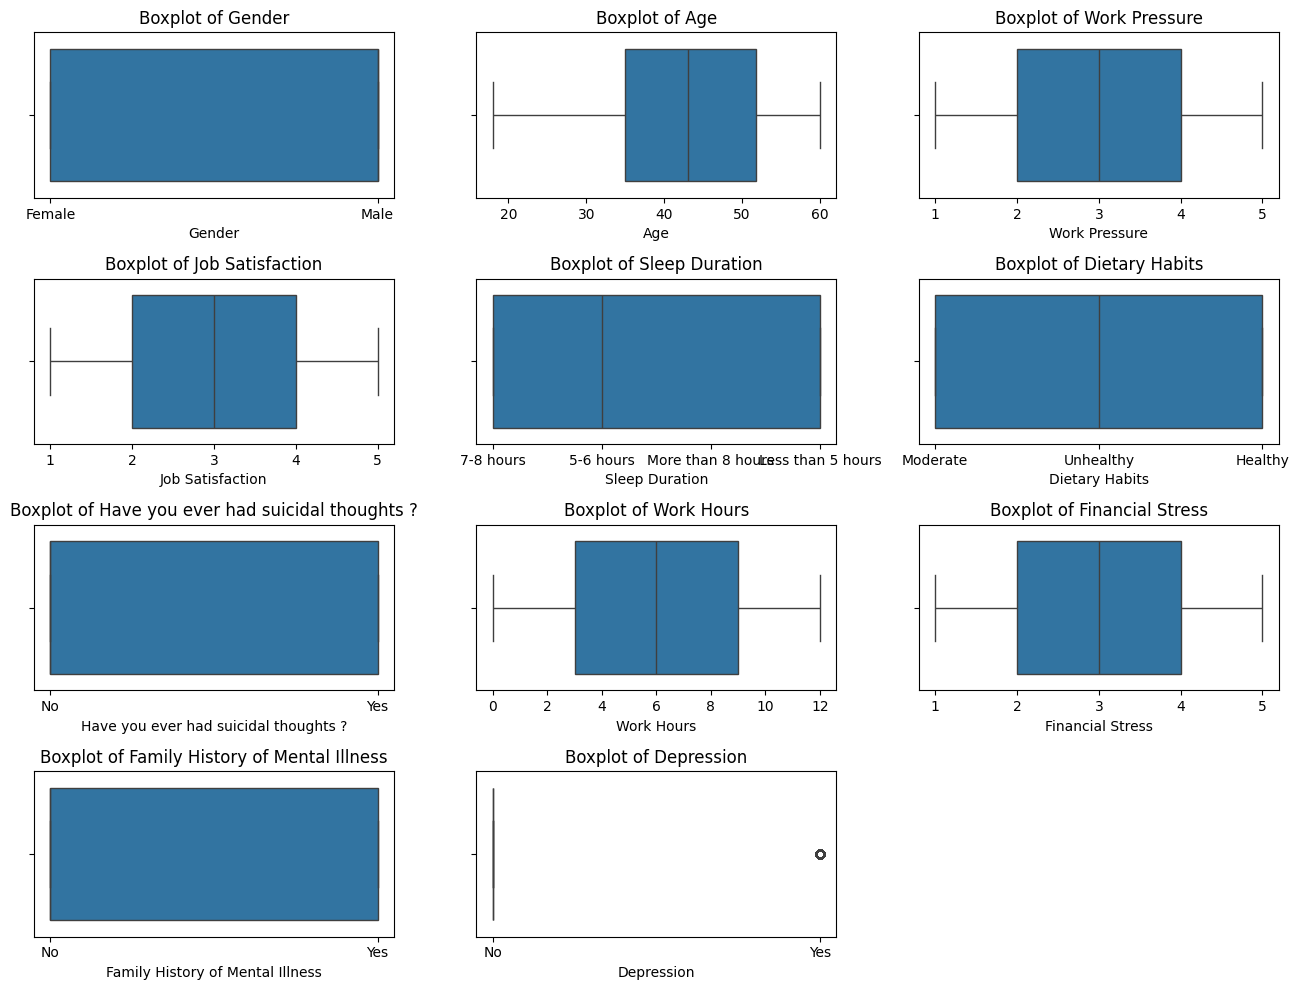

In [50]:
plt.figure(figsize=(13, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**ENCODE KOLOM NUMERIK**

In [52]:
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

**PISAH KAN FITUR DAN LABEL**

In [60]:
X = df.drop("Depression", axis=1)
y = df["Depression"]

**LAKUKAN NORMALISASI**

In [67]:
X_numerik = df.select_dtypes(include=['int64', 'float64'])

# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numerik)

**SPLIT DATA (TRAIN - TEST)**

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

**TANGANI IMBALANCE (SMOTE)**

In [69]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

**VISUALISASI**

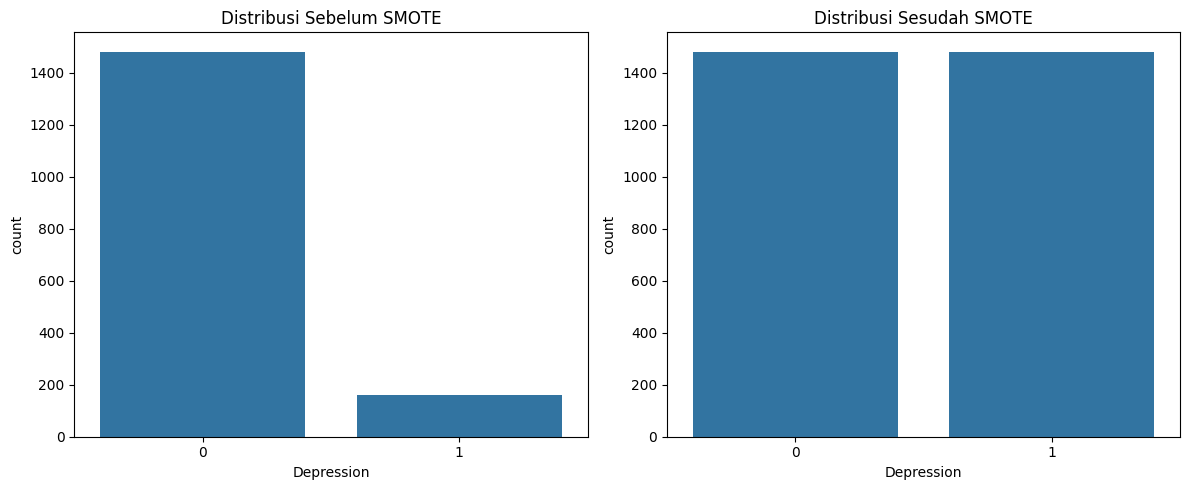

In [70]:
# Buat figure dengan 1 baris 2 kolom
plt.figure(figsize=(12, 5))

# Plot kiri: Sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Distribusi Sebelum SMOTE")

# Plot kanan: Sesudah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_sm)
plt.title("Distribusi Sesudah SMOTE")

plt.tight_layout()
plt.show()


TRAINING MODEL ANN

In [73]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8425 - loss: 0.4654 - val_accuracy: 0.9002 - val_loss: 0.2594
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9107 - loss: 0.2172 - val_accuracy: 0.9538 - val_loss: 0.1497
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9751 - loss: 0.1220 - val_accuracy: 0.9830 - val_loss: 0.0730
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9959 - loss: 0.0602 - val_accuracy: 1.0000 - val_loss: 0.0347
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0321 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.

**EVALUASI MODEL**

PREDIKSI PADA DATA UJI

In [74]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


AKURASI

In [77]:
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.2f}")

Akurasi: 1.00


KLASIFIKASI REPORT

In [78]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Tidak Depresi", "Depresi"]))


Classification Report:
               precision    recall  f1-score   support

Tidak Depresi       1.00      1.00      1.00       370
      Depresi       1.00      1.00      1.00        41

     accuracy                           1.00       411
    macro avg       1.00      1.00      1.00       411
 weighted avg       1.00      1.00      1.00       411



CONFUSION MATRIX

In [79]:
cm = confusion_matrix(y_test, y_pred)

VISUALISASI

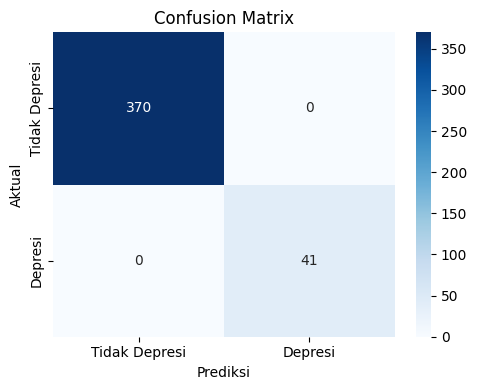

In [80]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Tidak Depresi", "Depresi"],
            yticklabels=["Tidak Depresi", "Depresi"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

**VISUALISASI KORELASI**

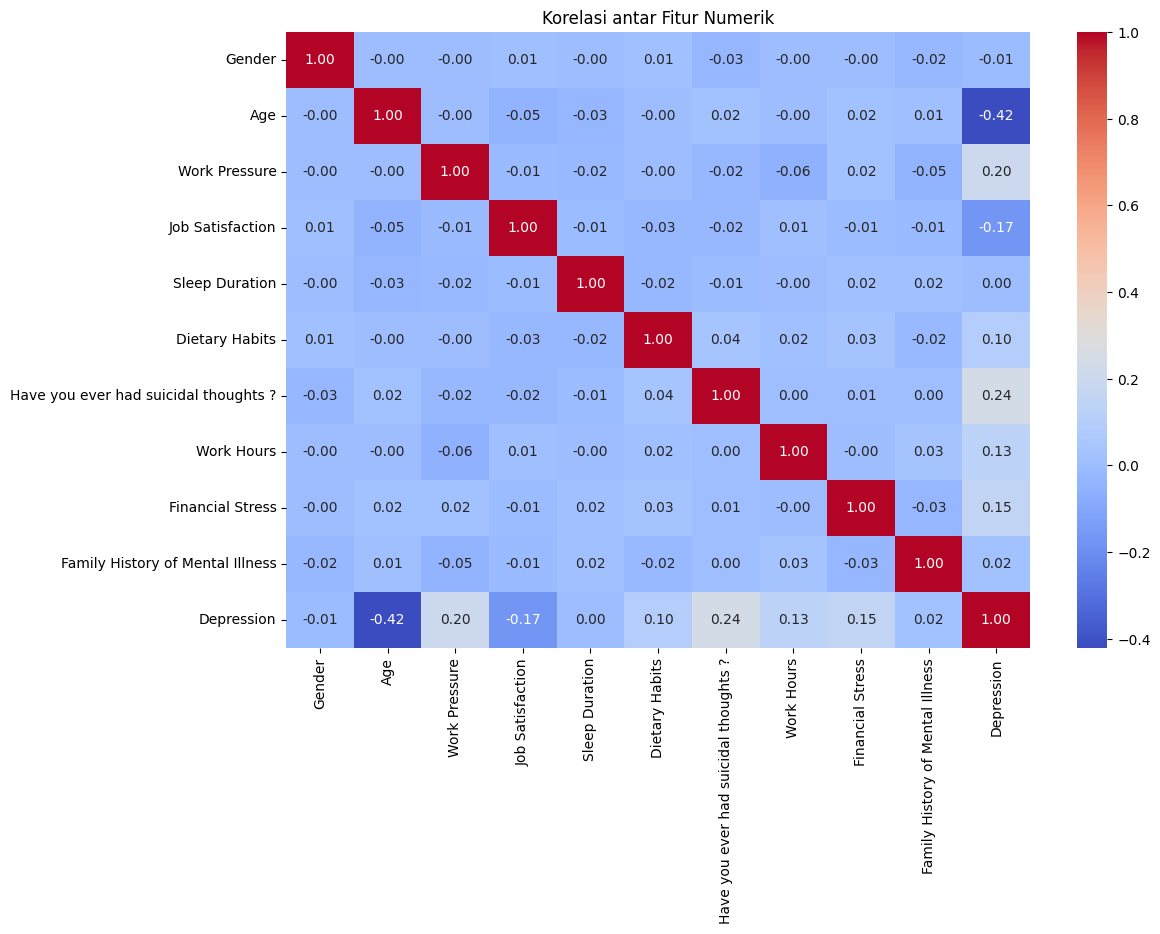

In [91]:
# Ambil hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64'])

# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerik.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

**LAPORAN AKHIR**

In [92]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score
)

In [93]:
# === Prediksi dan evaluasi ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Skor metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# ====== Laporan Evaluasi ======
print("\n====== Laporan Evaluasi Model ANN ======\n")
print(f"🔹 Accuracy       : {accuracy:.2f}")
print(f"🔹 Precision      : {precision:.2f}")
print(f"🔹 Recall         : {recall:.2f}")
print(f"🔹 F1-Score       : {f1:.2f}")
print(f"🔹 AUC Score      : {roc_auc:.2f}")
print("\n📊 Confusion Matrix:")
print(f"  ▪ True Negative : {tn}")
print(f"  ▪ False Positive: {fp}")
print(f"  ▪ False Negative: {fn}")
print(f"  ▪ True Positive : {tp}")

# ====== Interpretasi Singkat ======
print("\n🧠 Interpretasi:")
if recall >= 0.70:
    print("✔️  Recall tinggi: model cukup baik dalam mendeteksi individu yang mengalami depresi.")
else:
    print("⚠️  Recall rendah: model mungkin gagal mendeteksi sebagian yang benar-benar depresi.")

if precision >= 0.70:
    print("✔️  Precision tinggi: model cukup akurat, false positive rendah.")
else:
    print("⚠️  Precision rendah: kemungkinan banyak prediksi 'depresi' yang salah.")

# ====== Analisis Korelasi dengan Target (Optional) ======
# Korelasi hanya dihitung dari fitur numerik + label Depression yang diubah ke 0/1
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()
df_corr["Depression"] = LabelEncoder().fit_transform(df_corr["Depression"])

# Ambil hanya kolom numerik
df_corr_numeric = df_corr.select_dtypes(include=["int64", "float64"])

# Korelasi dengan 'Depression'
cor_target = df_corr_numeric.corr()["Depression"].sort_values(ascending=False)

print("\n📈 Korelasi Fitur terhadap Depresi:")
print(cor_target)

# Tampilkan Top 3 fitur yang paling berkorelasi (selain target itu sendiri)
print("\n🌟 Top 3 fitur dengan korelasi tertinggi ke 'Depression':")
print(cor_target[1:4].index.tolist())

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

====== Laporan Evaluasi Model ANN ======

🔹 Accuracy       : 1.00
🔹 Precision      : 1.00
🔹 Recall         : 1.00
🔹 F1-Score       : 1.00
🔹 AUC Score      : 1.00

📊 Confusion Matrix:
  ▪ True Negative : 370
  ▪ False Positive: 0
  ▪ False Negative: 0
  ▪ True Positive : 41

🧠 Interpretasi:
✔️  Recall tinggi: model cukup baik dalam mendeteksi individu yang mengalami depresi.
✔️  Precision tinggi: model cukup akurat, false positive rendah.

📈 Korelasi Fitur terhadap Depresi:
Depression                               1.000000
Have you ever had suicidal thoughts ?    0.239176
Work Pressure                            0.197509
Financial Stress                         0.151644
Work Hours                               0.128430
Dietary Habits                           0.096727
Family History of Mental Illness         0.017549
Sleep Duration                           0.000557
Gender                                  -0.007687
Job Satisfaction               